### Explore Bike Share Data

For this project, your goal is to ask and answer three questions about the available bikeshare data from Washington, Chicago, and New York.  This notebook can be submitted directly through the workspace when you are confident in your results.

You will be graded against the project [Rubric](https://review.udacity.com/#!/rubrics/2508/view) by a mentor after you have submitted.  To get you started, you can use the template below, but feel free to be creative in your solutions!

In [3]:
ny = read.csv('new_york_city.csv')
wash = read.csv('washington.csv')
chi = read.csv('chicago.csv')
library(dplyr)
library(ggplot2)

In [2]:
head(ny)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986


In [3]:
head(wash)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type
1621326,2017-06-21 08:36:34,2017-06-21 08:44:43,489.066,14th & Belmont St NW,15th & K St NW,Subscriber
482740,2017-03-11 10:40:00,2017-03-11 10:46:00,402.549,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber
1330037,2017-05-30 01:02:59,2017-05-30 01:13:37,637.251,17th St & Massachusetts Ave NW,5th & K St NW,Subscriber
665458,2017-04-02 07:48:35,2017-04-02 08:19:03,1827.341,Constitution Ave & 2nd St NW/DOL,M St & Pennsylvania Ave NW,Customer
1481135,2017-06-10 08:36:28,2017-06-10 09:02:17,1549.427,Henry Bacon Dr & Lincoln Memorial Circle NW,Maine Ave & 7th St SW,Subscriber
1148202,2017-05-14 07:18:18,2017-05-14 07:24:56,398.000,1st & K St SE,Eastern Market Metro / Pennsylvania Ave & 7th St SE,Subscriber


In [4]:
head(chi)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992
955915,2017-05-25 18:19:03,2017-05-25 18:45:53,1610,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992
9031,2017-01-04 08:27:49,2017-01-04 08:34:45,416,May St & Taylor St,Wood St & Taylor St,Subscriber,Male,1981
304487,2017-03-06 13:49:38,2017-03-06 13:55:28,350,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Subscriber,Male,1986
45207,2017-01-17 14:53:07,2017-01-17 15:02:01,534,Clark St & Randolph St,Desplaines St & Jackson Blvd,Subscriber,Male,1975
1473887,2017-06-26 09:01:20,2017-06-26 09:11:06,586,Clinton St & Washington Blvd,Canal St & Taylor St,Subscriber,Male,1990


### Question 1


**What is the most common month?**

Start.Month,n
06,14000
05,12180
04,10661
02,6364
03,5820
01,5745


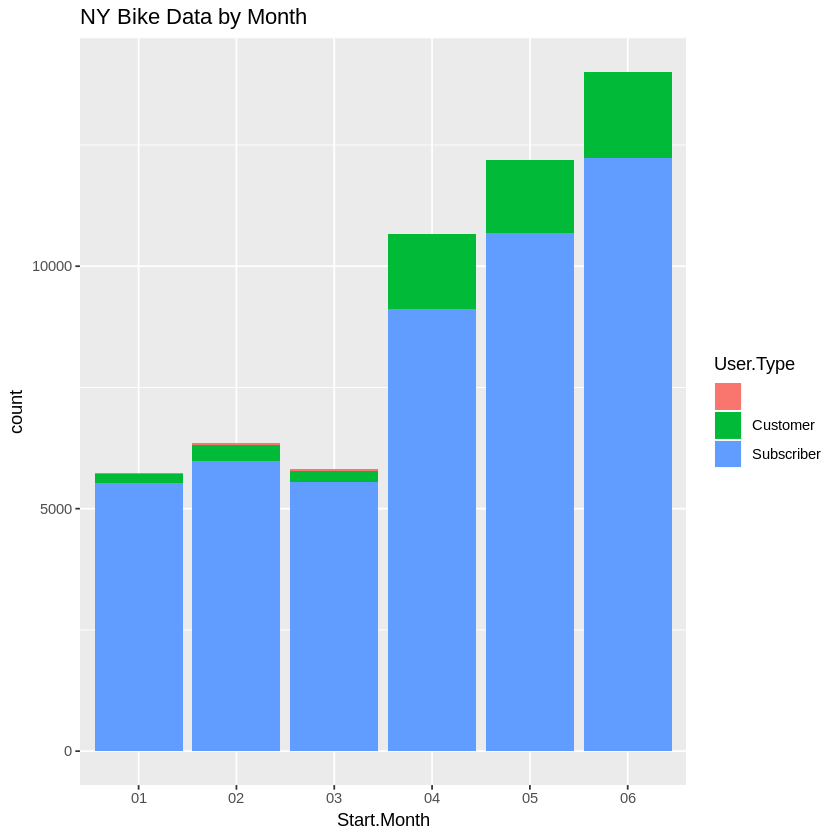

In [40]:
# Your solution code goes here
# create new column 'Start.Month' which extracts just the month in number format
ny$Start.Month = strftime(ny$Start.Time,"%m")
# create view of count(Start.Month) and group in descending order
ny %>% count(Start.Month) %>% arrange(desc(n)) %>% head(6)

# Create the data visualization
ny_plot <- ggplot(data = ny) +
  geom_bar(mapping = aes(x = Start.Month, fill = User.Type))
print(ny_plot + ggtitle("NY Bike Data by Month"))

Start.Month,n
06,20335
04,18522
05,17072
03,12612
02,11563
01,8946


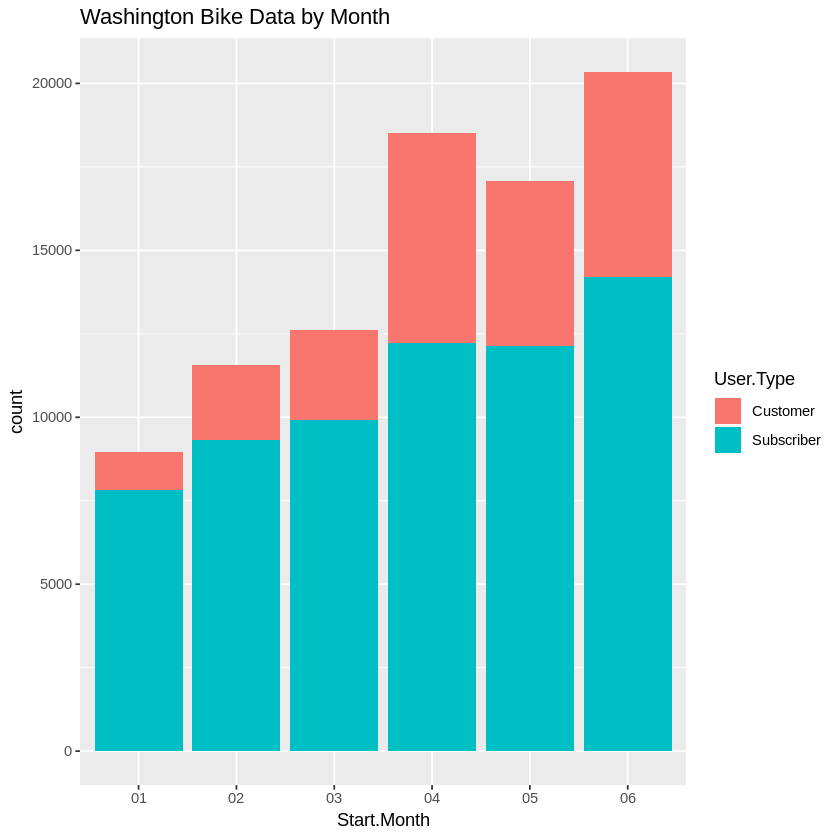

In [5]:
# filter out the NA rows using filter_all and save to a new dataframe 'clean_wash'
clean_wash <- wash %>% filter_all(all_vars(!is.na(.)))
# create new column 'Start.Month' which extracts just the month in number format
clean_wash$Start.Month = strftime(clean_wash$Start.Time,"%m")
# create view of count(Start.Month) and group in descending order
clean_wash %>% count(Start.Month) %>% arrange(desc(n)) %>% head(6)

wash_plot <- ggplot(data = clean_wash) +
  geom_bar(mapping = aes(x = Start.Month, fill = User.Type))
print(wash_plot + ggtitle("Washington Bike Data by Month"))

Start.Month,n
06,2816
05,1905
04,1526
02,930
03,803
01,650


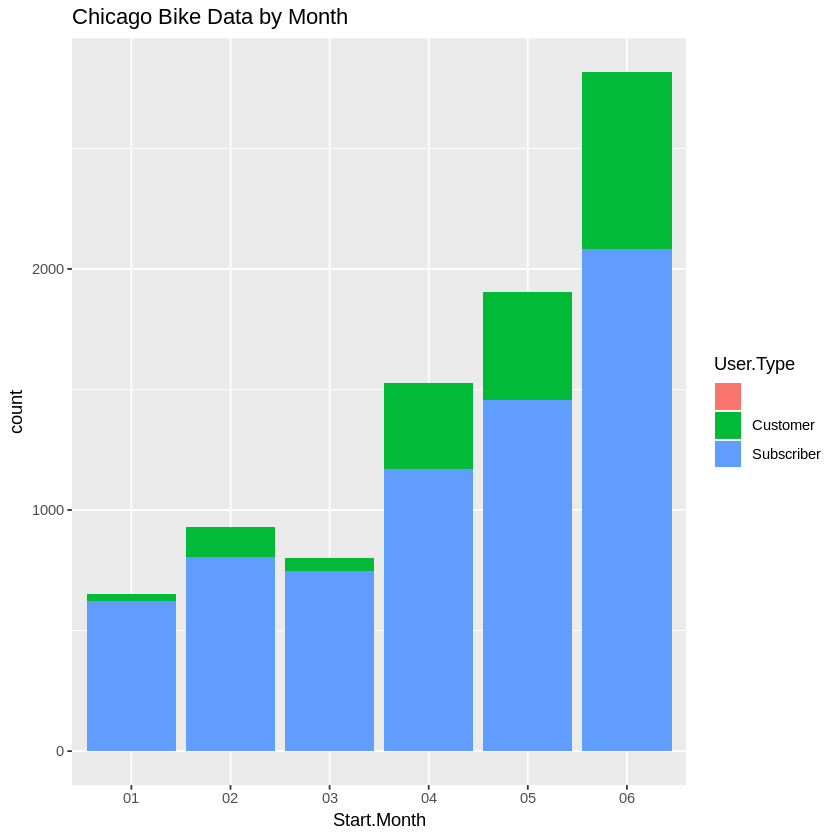

In [6]:
# create new column 'Start.Month' which extracts just the month in number format
chi$Start.Month = strftime(chi$Start.Time,"%m")
# create view of count(Start.Month) and group in descending order
chi %>% count(Start.Month) %>% arrange(desc(n)) %>% head(6)

chi_plot <- ggplot(data = chi) +
  geom_bar(mapping = aes(x = Start.Month, fill = User.Type))
print(chi_plot + ggtitle("Chicago Bike Data by Month"))

**Summary**

By looking at each table of all the dataframes, we  can see that June is the most common month for bike rides.

**Insight**

By adding User.Type to the stacked bar chart, we can see the breakdown of Subscribers to Customers. This data can be used to make better decisions in marketing, and turning customers into subscribers.

### Question 2

**What is the most common start station?**

In [36]:
# Your solution code goes here
# create view of count(Start.Station) and group in descending order
ny %>% count(Start.Station) %>% arrange(desc(n)) %>% head(3)

Start.Station,n
Pershing Square North,592
W 21 St & 6 Ave,385
Broadway & E 22 St,383


In [37]:
# create view of count(Start.Station) and group in descending order
clean_wash %>% count(Start.Station) %>% arrange(desc(n)) %>% head(3)

Start.Station,n
Columbus Circle / Union Station,1700
Lincoln Memorial,1546
Jefferson Dr & 14th St SW,1488


In [38]:
# create view of count(Start.Station) and group in descending order
chi %>% count(Start.Station) %>% arrange(desc(n)) %>% head(3)

Start.Station,n
Streeter Dr & Grand Ave,210
Lake Shore Dr & Monroe St,140
Clinton St & Washington Blvd,120


**Summary**

We can see the most common stations are: 

Pershing Square North in NY

Columbus Circle / Union Station in Washington

Streeter Dr & Grand Ave in Chicago

**Insight**

We should investigate these areas and see what riders like about them, and perhaps apply those things to other stations in attempt to increase numbers.


### Question 3

**What is the total travel time for users in different cities?**

In [108]:
# Your solution code goes here
# filter out the NA rows using filter_all and save to a new dataframe 'clean_wash'
clean_ny <- ny %>% filter_all(all_vars(!is.na(.)))
total_seconds = ceiling(sum(clean_ny$Trip.Duration))
total_minutes = ceiling(total_seconds / 60)
total_hours = ceiling(total_minutes / 60)
paste0("Total Seconds: ", total_seconds)
paste0("Total Minutes: ", total_minutes)
paste0("Total Hours: ", total_hours)

[1] "Total Seconds: 39410864"

[1] "Total Minutes: 656848"

[1] "Total Hours: 10948"

In [109]:
total_seconds = ceiling(sum(clean_wash$Trip.Duration))
total_minutes = ceiling(total_seconds / 60)
total_hours = ceiling(total_minutes / 60)
paste0("Total Seconds: ", total_seconds)
paste0("Total Minutes: ", total_minutes)
paste0("Total Hours: ", total_hours)

[1] "Total Seconds: 109883545"

[1] "Total Minutes: 1831393"

[1] "Total Hours: 30524"

In [111]:
total_seconds = ceiling(sum(chi$Trip.Duration))
total_minutes = ceiling(total_seconds / 60)
total_hours = ceiling(total_minutes / 60)
paste0("Total Seconds: ", total_seconds)
paste0("Total Minutes: ", total_minutes)
paste0("Total Hours: ", total_hours)

[1] "Total Seconds: 8087801"

[1] "Total Minutes: 134797"

[1] "Total Hours: 2247"

**Summary:**

Total Hours spent travelling in Washington: 30,524

Total Hours spent travelling in NY: 10,948

Total Hours spent travelling in Chicago: 2,247

**Insight**

Washington has more than double the hours than NY and Chicago combined. With this data, we could focus efforts in Washington area, to keep improving sales. Or, we could look at what is working in Washington, and apply that to NY and Chicago, to help increase sales there.


## Finishing Up

> Congratulations!  You have reached the end of the Explore Bikeshare Data Project. You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the [rubric](https://review.udacity.com/#!/rubrics/2508/view). 


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [41]:
system('python -m nbconvert Explore_bikeshare_data.ipynb')